In [7]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
input_csv = '../../data/mock/wog_overview_level3_FY-2016_graph1.csv'
df = pd.read_csv(input_csv)
print(df)

    Manual Invoices  Unit Rates                   Type
0              4700        16.0                Profile
1              3500        29.5                Profile
2              5100        27.0                Profile
3              5300        38.0  Selected Organization
4              6000        42.0                Profile
5              4600        55.0                Profile
6              3000        68.0                Profile
7              7100        38.0                Profile
8              8800        41.0                Profile
9              8900        16.5                Profile
10            12800        31.0                Profile
11            14800        17.0                Profile
12            13200        48.0                Profile
13            24100        13.0                Profile
14            25400        19.0                Profile
15            28000        13.0                Profile


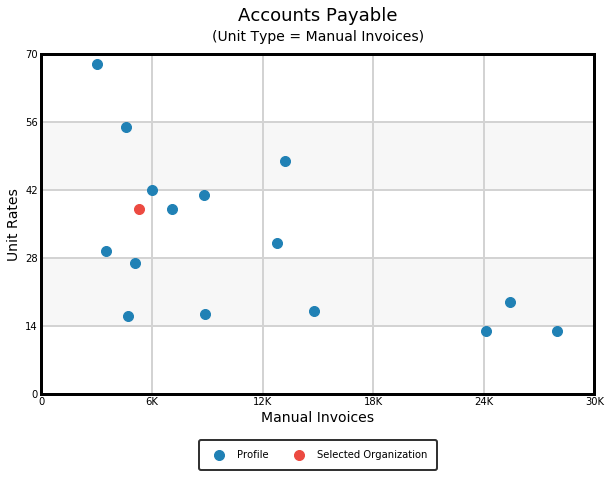

In [9]:
# Initialize figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)
profiles = df[df['Type'] == 'Profile']
ax.scatter(profiles['Manual Invoices'], profiles['Unit Rates'], c="#2081b5", s=100, zorder=2)
selected_orgs = df[df['Type'] == 'Selected Organization']
ax.scatter(selected_orgs['Manual Invoices'], selected_orgs['Unit Rates'], c="#ec4a41", s=100, zorder=2)

fig.set_size_inches(8,5)
fig.tight_layout(pad=0)
ax.yaxis.set_ticks(range(0,71,14))
ax.xaxis.set_ticks(range(0,30001,6000))
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlim(0, 30000)
ax.set_ylim(0, 70)
ax.set_ylabel('Unit Rates', fontsize=14)
ax.set_xlabel('Manual Invoices', fontsize=14)

# Put alternating vertical colors on the grid
ax.fill_between((0,30000), 14, 28, color='#f7f7f7')
ax.fill_between((0,30000), 42, 56, color='#f7f7f7')

# Grid and labels formatting
def format_xlabels(x,y):
    if x == 0:
        return int(x)
    else:
        return '{}K'.format(int(x/1000))
ax.xaxis.set_major_formatter(FuncFormatter(format_xlabels))
ax.yaxis.grid(color='lightgray', linewidth=2, zorder=1)
ax.xaxis.grid(color='lightgray', linewidth=2, zorder=1)
ax.set_title('Accounts Payable', position=(0.5,1.08), fontsize=18)
ax.text(0.5, 1.05, '(Unit Type = Manual Invoices)', transform=ax.transAxes, ha='center', va='center', fontsize=14)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

# Draw and format the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, ['Profile', 'Selected Organization'], ncol=2, bbox_to_anchor=(0.5, -0.18), loc='center', borderpad=1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_linewidth(2)
frame.set_edgecolor('black')

# Write to a file
fig.savefig('../../reports/figures/mock/wog_overview_level3_FY-2016_graph1.pdf', bbox_inches='tight')

In [10]:
input_csv = '../../data/mock/wog_overview_level3_FY-2016_graph2.csv'
df_orig = pd.read_csv(input_csv)
print(df)

    Manual Invoices  Unit Rates                   Type
0              4700        16.0                Profile
1              3500        29.5                Profile
2              5100        27.0                Profile
3              5300        38.0  Selected Organization
4              6000        42.0                Profile
5              4600        55.0                Profile
6              3000        68.0                Profile
7              7100        38.0                Profile
8              8800        41.0                Profile
9              8900        16.5                Profile
10            12800        31.0                Profile
11            14800        17.0                Profile
12            13200        48.0                Profile
13            24100        13.0                Profile
14            25400        19.0                Profile
15            28000        13.0                Profile


In [11]:
df = pd.DataFrame()
for colname in list(df_orig.columns):
    if colname == 'Cost Type':
        df[colname] = df_orig[colname]
    else:
        df[colname] = (df_orig[colname]/df_orig[colname].sum()) * 100
print(df)

   Profile - Accounts Payable  Accounts Payable         Cost Type
0                   49.645390         93.023256    Employee Costs
1                    7.092199          0.000000  Contractor Costs
2                    5.673759          0.000000       Consultants
3                   14.184397          1.162791    Supplier Costs
4                   10.638298          5.813953       Other Costs
5                   12.765957          0.000000           Unknown


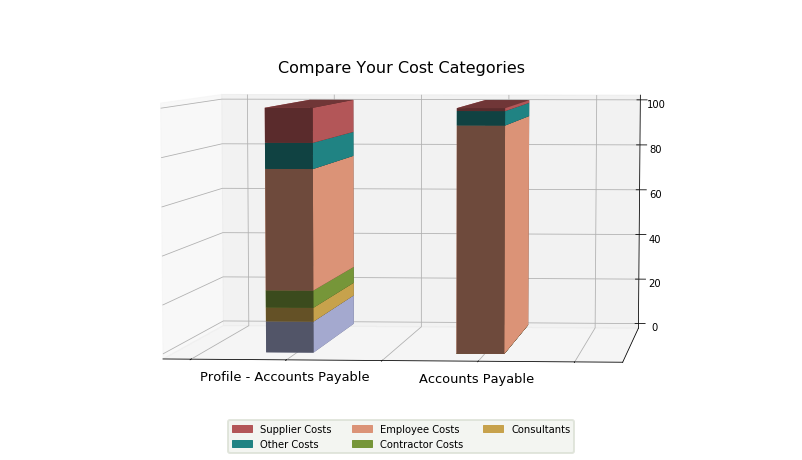

In [12]:
cost_type_colors = (
    ('Supplier Costs', '#b35658'),
    ('Other Costs', '#208383'),
    ('Employee Costs', '#db9377'),
    ('Contractor Costs', '#769639'),
    ('Consultants', '#c7a24c'),
    ('Unknown', '#a4a9cf')
)

df['Order'] = df['Cost Type'].apply(lambda x: [i[0] for i in cost_type_colors].index(x))
df['Color'] = df['Cost Type'].apply(lambda x: dict(cost_type_colors)[x])
df = df.sort_values('Order', ascending=False)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')

def create_stacked_bar(pos, values, colors):
    lastx = 0
    thickness = 0.25
    pos -= thickness/2
    for x,color in list(zip(values, colors)):
        ax.bar3d(pos,1,lastx,thickness,1,x, color=color)
        lastx += x

bars = {
    1: {'name': 'Accounts Payable'},
    2: {'name': 'Profile - Accounts Payable'}
}

for n in bars:
    create_stacked_bar(n, df[bars[n]['name']], df['Color'])

def format_xtick_labels(x,y):
    try:
        return bars[x]['name']
    except KeyError:
        return ''

title_attrs = {
    'fontsize': 16,
    'verticalalignment': 'bottom'
}
title = ax.set_title('Compare Your Cost Categories', fontdict=title_attrs, transform=ax.transAxes)
title.set_position((0.5,0.85))
ax.set_xlim(0.3,2.6)
ax.set_yticks([])
ax.xaxis.set_major_formatter(FuncFormatter(format_xtick_labels))
for t in ax.xaxis.get_major_ticks(): 
    t.label.set_fontsize(13)

ax.view_init(azim=95, elev=5)

# Draw the legend
handles = []
for cost_type, color in cost_type_colors:
    if cost_type != 'Unknown':
        patch = mpatches.Patch(color=color, label=cost_type)
        handles.append(patch)
legend = ax.legend(handles=handles, loc='lower center', ncol=3)
legend.set_bbox_to_anchor((0.5,-0.03))
frame = legend.get_frame()
frame.set_linewidth(2)
frame.set_facecolor('#f0f3ee')
frame.set_edgecolor('#dbe0d5')

# Write to a file
fig.savefig('../../reports/figures/mock/wog_overview_level3_FY-2016_graph2.pdf', bbox_inches='tight')